In [1]:
###################################SENSITIVITY ANALYSIS###################################
sensitivity_met_data <- read.table("../data/sensitivity_met_data.txt", sep=" ", header=TRUE)

print(summary(sensitivity_met_data))



                   X         Rl_downwell       AT_mbar       Rs_downwell     
 2017-08-03 00:00:00:   1   Min.   :234.2   Min.   :857.2   Min.   :-10.536  
 2017-08-03 00:30:00:   1   1st Qu.:296.0   1st Qu.:870.2   1st Qu.: -6.132  
 2017-08-03 01:00:00:   1   Median :325.2   Median :874.6   Median : 29.274  
 2017-08-03 01:30:00:   1   Mean   :314.1   Mean   :873.8   Mean   :130.525  
 2017-08-03 02:00:00:   1   3rd Qu.:337.0   3rd Qu.:878.3   3rd Qu.:209.241  
 2017-08-03 02:30:00:   1   Max.   :357.9   Max.   :882.3   Max.   :906.671  
 (Other)            :1770                   NA's   :1                        
       rH           T_b_1477          D_g_1477       F_1_s_g_1477    
 Min.   :36.73   Min.   :-0.3046   Min.   : 31.79   Min.   : 0.2499  
 1st Qu.:71.45   1st Qu.: 5.2602   1st Qu.:128.66   1st Qu.: 2.9417  
 Median :80.11   Median : 6.7863   Median :209.16   Median : 4.5235  
 Mean   :77.10   Mean   : 6.5791   Mean   :208.65   Mean   : 4.5739  
 3rd Qu.:85.00   3rd Qu.: 

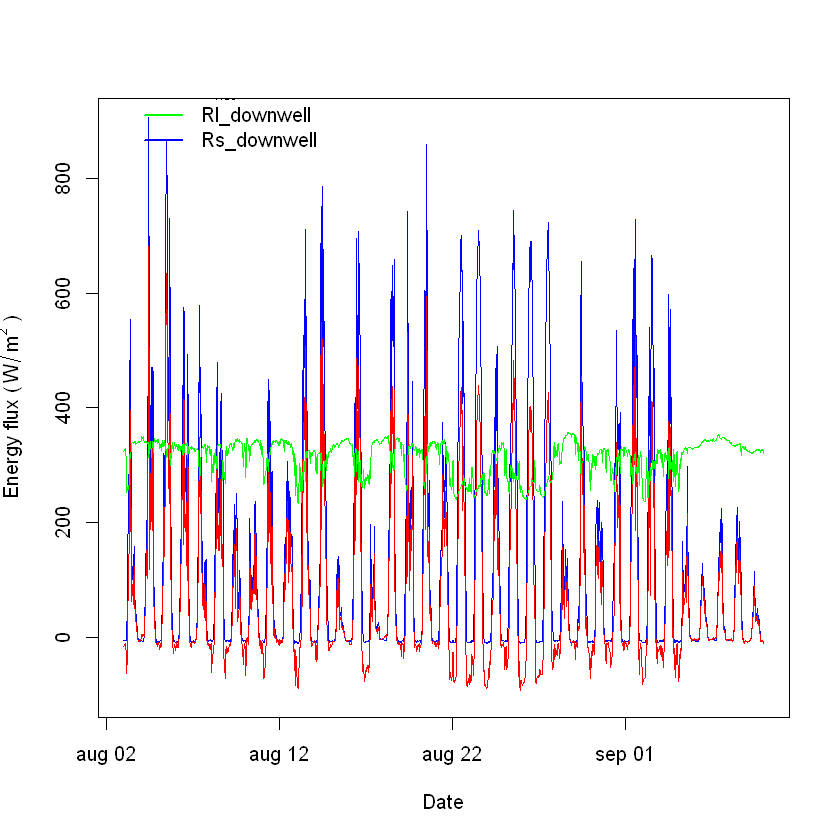

In [2]:
#Plotter alle strlingsflukser
par(mfrow=c(1,1))
plot(as.POSIXct(sensitivity_met_data$X), sensitivity_met_data$Rs_downwell, type = "l", col="blue", 
     xlab = "Date", ylab = expression(paste("Energy flux ( ", W/m^2," )", sep="")),ylim=c(-100,900))
points(as.POSIXct(sensitivity_met_data$X), sensitivity_met_data$Rnet, type = "l", col="red")
points(as.POSIXct(sensitivity_met_data$X), sensitivity_met_data$Rl_downwell, type ="l", col="green")
legend(as.POSIXct(sensitivity_met_data$X)[5], 1000, 
       legend=c(expression(paste(R[net]),Rl_downwell, Rs_downwell)), bty="n",
       col=c("red", "green", "blue"), text.width = 1, lwd = 2, lty=1)


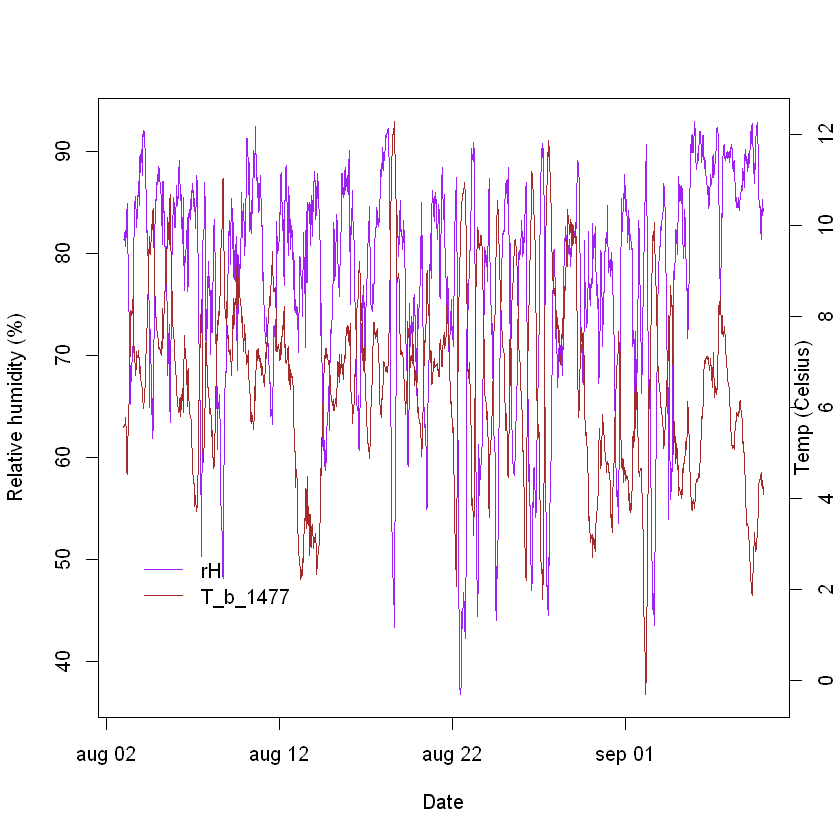

In [3]:
#Plotter rH og T_b_1477
plot(as.POSIXct(sensitivity_met_data$X), sensitivity_met_data$rH, type="l", col="purple",
     xlab = "Date", ylab="Relative humidity (%)")
par(new=TRUE)
plot(as.POSIXct(sensitivity_met_data$X), sensitivity_met_data$T_b_1477, axes=FALSE, type="l",
     col="brown", xlab="Date", ylab=" ")
axis(side=4)
mtext("Temp (Celsius)", side=4, line=0)
legend(as.POSIXct(sensitivity_met_data$X)[5], 3, bty="n",
       legend=c("rH", "T_b_1477"), col=c("purple", "brown"), text.width = 1, lwd = 1, lty=1)



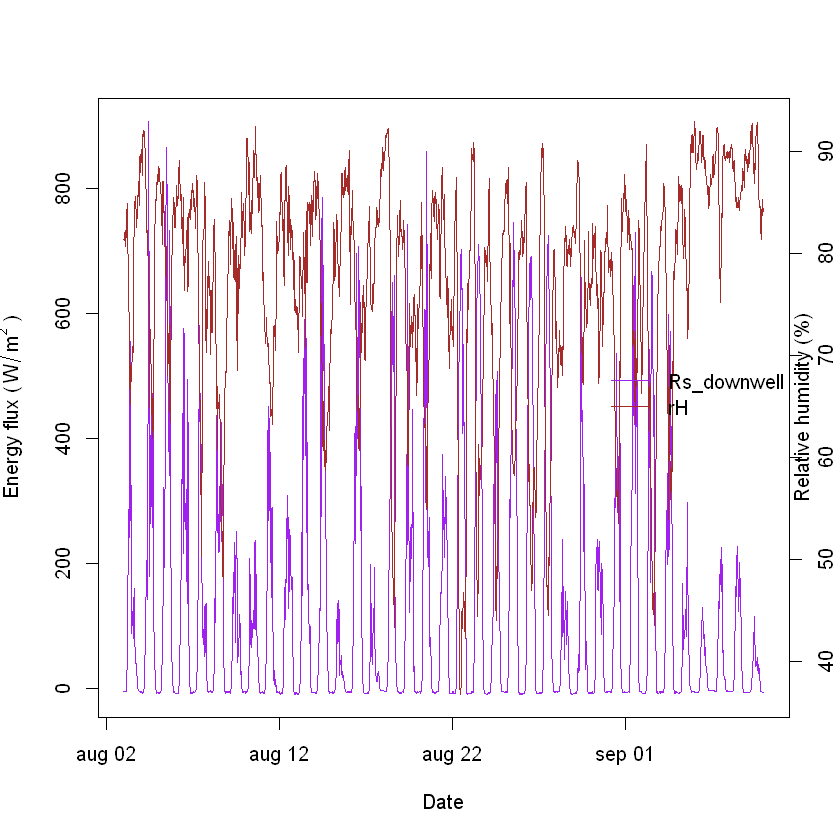

In [4]:
#Plotter rH og Rs_downwell
plot(as.POSIXct(sensitivity_met_data$X), sensitivity_met_data$Rs_downwell, type="l", col="purple",
     xlab = "Date", ylab = expression(paste("Energy flux ( ", W/m^2," )", sep="")))
par(new=TRUE)
plot(as.POSIXct(sensitivity_met_data$X), sensitivity_met_data$rH, axes=FALSE, type="l",
     col="brown", xlab="Date", ylab=" ")
axis(side=4)
mtext("Relative humidity (%)", side=4, line=0)
legend(as.POSIXct(sensitivity_met_data$X)[1300], 70, bty="n",
       legend=c("Rs_downwell", "rH"), col=c("purple", "brown"), text.width = 1, lwd = 1, lty=1)



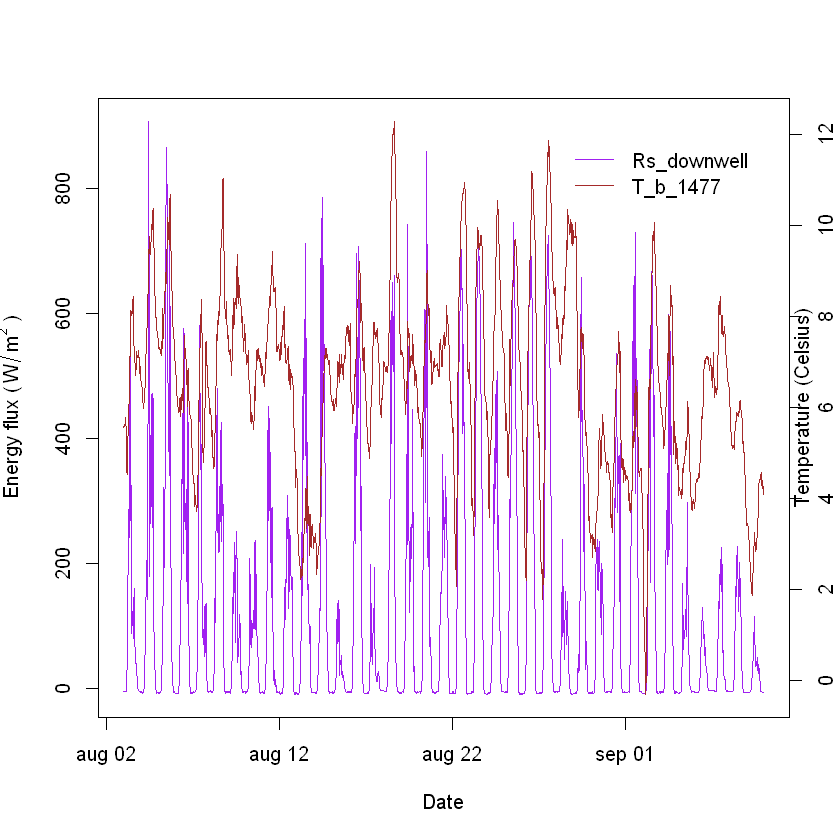

In [5]:
#Plotter Rs_downwell og T_b_1477
plot(as.POSIXct(sensitivity_met_data$X), sensitivity_met_data$Rs_downwell, type="l", col="purple",
     xlab = "Date", ylab = expression(paste("Energy flux ( ", W/m^2," )", sep="")))
par(new=TRUE)
plot(as.POSIXct(sensitivity_met_data$X), sensitivity_met_data$T_b_1477, axes=FALSE, type="l",
     col="brown", xlab="Date", ylab=" ")
axis(side=4)
mtext("Temperature (Celsius)", side=4, line=0)
legend(as.POSIXct(sensitivity_met_data$X)[1200], 12, bty="n",
       legend=c("Rs_downwell", "T_b_1477"), col=c("purple", "brown"), text.width = 1,lwd = 1,lty=1)




In [6]:
#Correlation matrix
print(cor(sensitivity_met_data[,c("Rl_downwell", "Rs_downwell", "AT_mbar", "rH", "T_b_1477",
                                  "D_g_1477", "F_1_s_g_1477", "Rnet")], use="complete"))



             Rl_downwell Rs_downwell     AT_mbar         rH    T_b_1477
Rl_downwell    1.0000000 -0.28002586 -0.34259776  0.4339315  0.13958169
Rs_downwell   -0.2800259  1.00000000  0.06005401 -0.6697509  0.45557416
AT_mbar       -0.3425978  0.06005401  1.00000000 -0.2378930 -0.01118531
rH             0.4339315 -0.66975087 -0.23789300  1.0000000 -0.57637096
T_b_1477       0.1395817  0.45557416 -0.01118531 -0.5763710  1.00000000
D_g_1477      -0.1445082  0.19301511 -0.03711098 -0.1837821  0.06626191
F_1_s_g_1477   0.3105944  0.05172115 -0.15887291  0.1436151 -0.05296362
Rnet          -0.1011942  0.98047922 -0.01006532 -0.5794797  0.44219410
                D_g_1477 F_1_s_g_1477        Rnet
Rl_downwell  -0.14450822   0.31059438 -0.10119424
Rs_downwell   0.19301511   0.05172115  0.98047922
AT_mbar      -0.03711098  -0.15887291 -0.01006532
rH           -0.18378210   0.14361514 -0.57947971
T_b_1477      0.06626191  -0.05296362  0.44219410
D_g_1477      1.00000000   0.05795041  0.17255735
F_

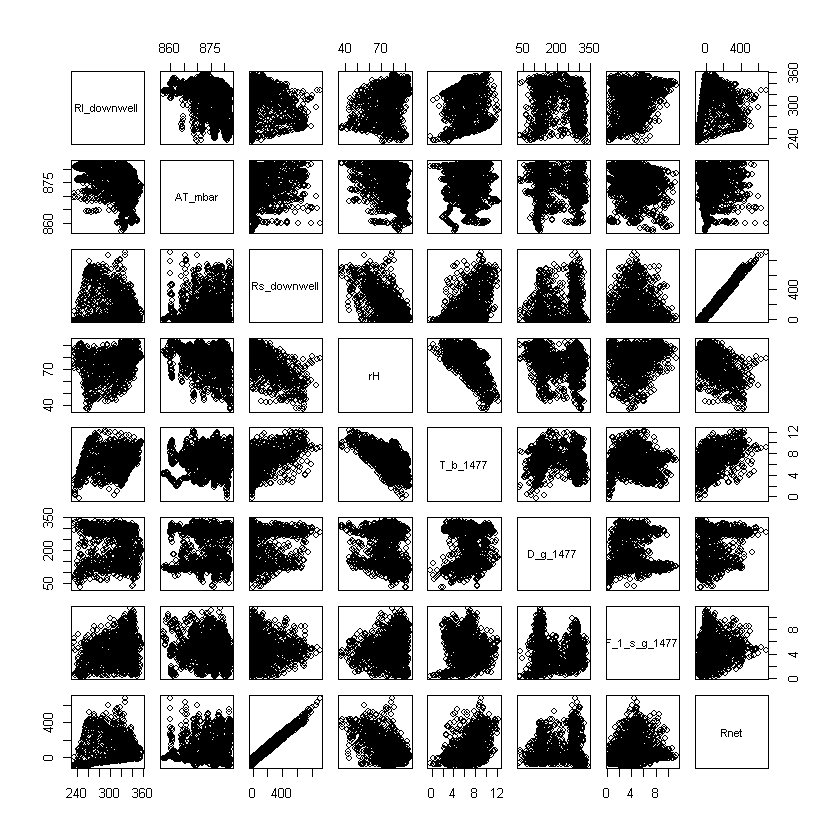

In [7]:
#Scatterplot matrix
pairs(sensitivity_met_data[,2:9])

#plot(as.Date(sensitivity_met_data$X), sensitivity_met_data$Rl_downwell, type="l")


Standard deviations (1, .., p=7):
[1] 1.5488821 1.2182689 1.0212878 0.9255969 0.8280488 0.5822726 0.4385434

Rotation (n x k) = (7 x 7):
                    PC1         PC2         PC3         PC4        PC5
AT_mbar       0.2190035  0.47975191 -0.10007075  0.57909639 -0.5838574
D_g_1477      0.1916104 -0.12096081  0.78908268 -0.32211704 -0.4698577
F_1_s_g_1477 -0.1524964 -0.46639932  0.35161382  0.72471141  0.1281883
rH           -0.5936240  0.06915725  0.07765593 -0.03992851 -0.0670467
Rl_downwell  -0.3550928 -0.52545335 -0.26529859 -0.00345878 -0.4255456
Rs_downwell   0.5121238 -0.24676307  0.06504222  0.13534246  0.3483946
T_b_1477      0.3889944 -0.44260851 -0.40380419 -0.12552901 -0.3390413
                     PC6          PC7
AT_mbar       0.18454454  0.039530548
D_g_1477      0.03800574  0.005695151
F_1_s_g_1477 -0.29894617  0.067650389
rH            0.32472062  0.724751266
Rl_downwell   0.40043330 -0.431250204
Rs_downwell   0.71309288  0.156233317
T_b_1477     -0.31755047  0.5

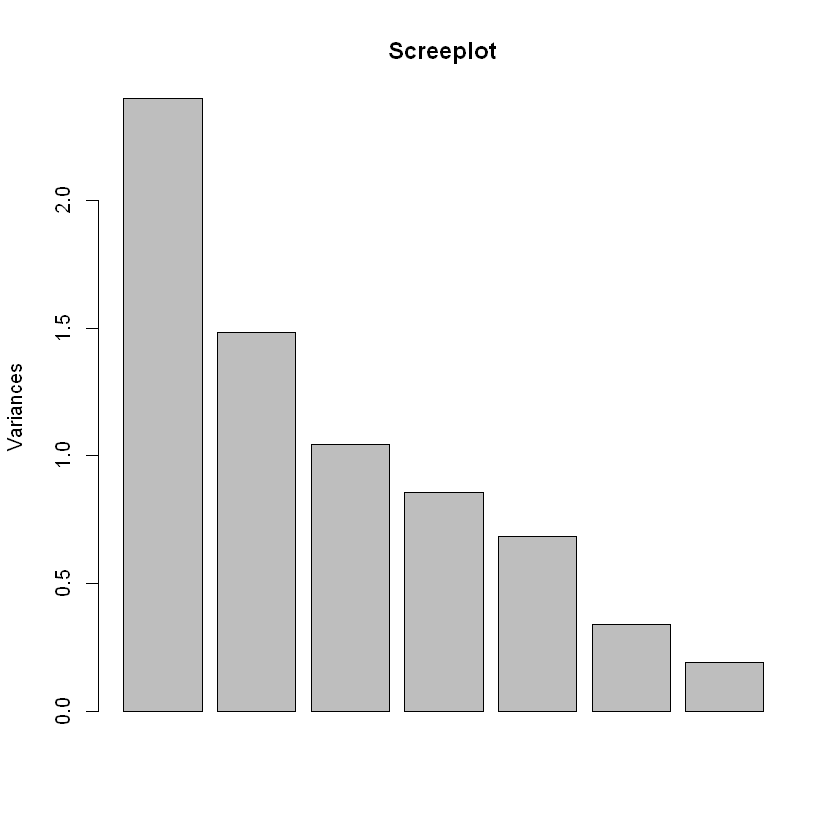

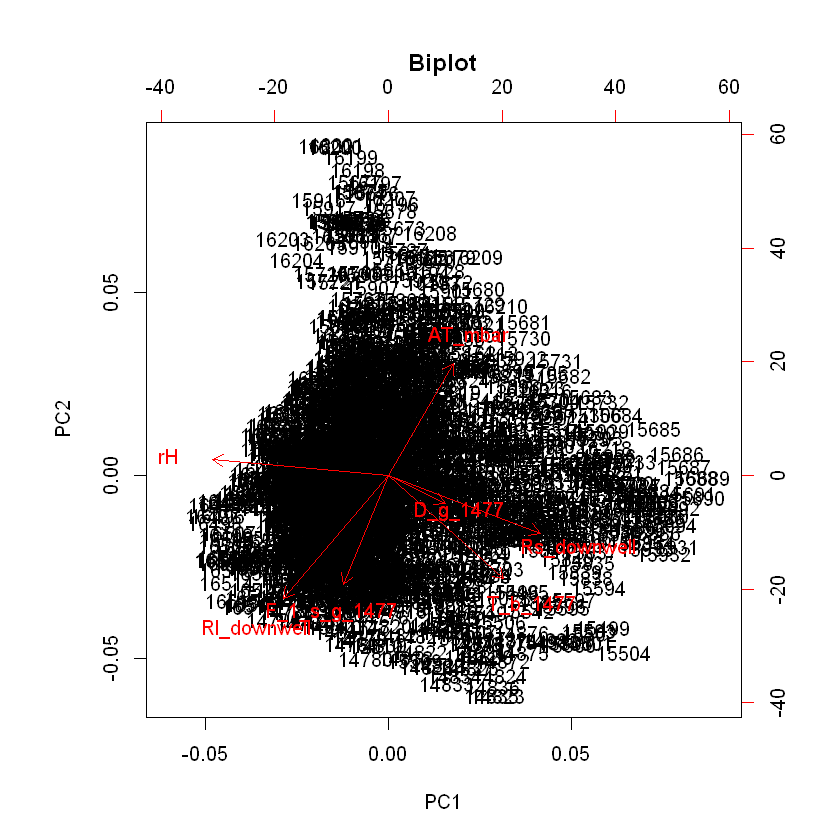

In [8]:
#PCA
pca_mod <- prcomp(~AT_mbar+D_g_1477+F_1_s_g_1477+rH+Rl_downwell+Rs_downwell+T_b_1477,
                  scale.=TRUE, data=sensitivity_met_data)
print(pca_mod)
print(summary(pca_mod))
screeplot(pca_mod, main="Screeplot")
biplot(pca_mod, main="Biplot")